In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.viridis()

In [3]:

# Inputs
f_mean = 20 #Hz
f_base = 5 #Hz
f_peak = 152.8 #Hz
sigma_stim = 2
t_stim = 0.02 #s

rate = f_base + f_peak

In [4]:
T = 100
dt = 0.1
times = np.arange(0, T+dt, dt)
previous_spike_time = None
Vem = np.ones(len(times)) * v_rest
input_spikes = np.random.poisson(rate/1000., len(times))
input_spikes = np.clip(input_spikes, 0,1)
g = np.ones(len(times)) * g_max
print (np.count_nonzero(input_spikes))
plt.plot(input_spikes)

NameError: name 'v_rest' is not defined

In [ ]:
for i, t in enumerate(times):
    if input_spikes[i]:
        previous_spike_time = t
    
    if previous_spike_time:
        g[i] = g[i-1] + g[i-1] * (np.e **(-(t-previous_spike_time)/tau_ex) )
        
    

In [ ]:
plt.plot(g)

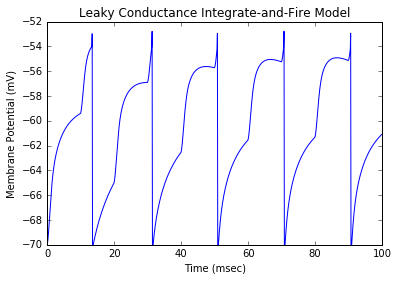

In [30]:
## setup parameters and state variables
rate    = 100                  # per sec
T       = 100                  # total time to simulate (msec)
dt      = 0.1               # simulation time step (msec)
time    = np.arange(0, T+dt, dt) # time array
t_rest  = 0                   # initial refractory time
no_spikes = 0
poisson_presynaptic_spikes = np.random.poisson(rate/1000., len(time))
regular_presynaptic_spikes = np.zeros(len(time))
x = [int(i * (len(time)//(float(rate) / 1000. * T))) for i in range(int(float(rate) / 1000. * T))]
regular_presynaptic_spikes[x] = 1.
previous_spike = 0
    
# Membrane
v_rest = -70 #mV
e_ext = 0 #V
v_thr = -54 #mV
g_max = 0.2
tau_m = 20. #ms
tau_ex = 5. #ms
    

## LIF properties
Vm      = np.ones(len(time)) * v_rest    # potential (V) trace over time
Rm      = 1                   # resistance (kOhm)
Cm      = 10                  # capacitance (uF)
# tau_m   = Rm*Cm               # time constant (msec)
tau_ref = dt * 3                  # refractory period (msec)
Vth     = 1                   # spike threshold (V)
V_spike = 1                 # spike delta (V)
g = np.ones(len(time))*g_max

## Stimulus
I       = 1.5                 # input current (A)

## iterate over each time step
for i, t in enumerate(time): 
    if regular_presynaptic_spikes[i]:
        previous_spike = t
#     g[i] = g_max

    g[i] = g[i] + g[i-1] * np.e ** (-(t - previous_spike)/tau_ex)
    if t > t_rest:
        Vm[i] = Vm[i-1] + (v_rest-Vm[i-1] + g[i] * (e_ext - Vm[i-1])) / tau_m * dt
        if Vm[i] >= v_thr:
            Vm[i] += V_spike
#             g[i] = 0
            no_spikes += 1
            t_rest = t + tau_ref

## plot membrane potential trace
plt.plot(time, Vm)
plt.title('Leaky Conductance Integrate-and-Fire Model')
plt.ylabel('Membrane Potential (mV)')
plt.xlabel('Time (msec)')
# plt.ylim([0,2])

In [31]:
print "empirical fireing rate (per sec) = ", float(no_spikes) / T * 1000. 
empiricical_rate = float(no_spikes) / T * 1000.

empirical fireing rate (per sec) =  50.0


In [32]:
np.count_nonzero(regular_presynaptic_spikes) / float(len(times))

0.00999000999000999

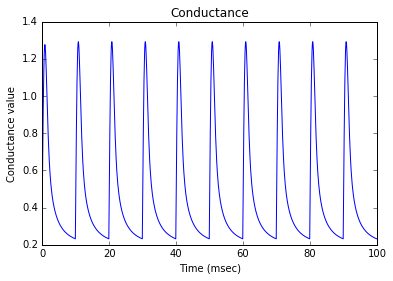

In [33]:
## plot membrane potential trace
plt.plot(time, g)
plt.title('Conductance')
plt.ylabel('Conductance value')
plt.xlabel('Time (msec)')

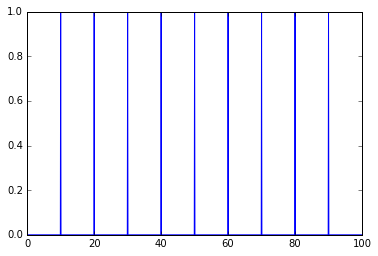

In [23]:
plt.plot(time, regular_presynaptic_spikes)